# Writing CUDA kernels in Python

In this session we learn about how we can write simple kernels in python, translate them into C++ code using an LLM and leverage pytorch's tool to compile the kernel into a module we can load and execute from python.

Video link: https://www.youtube.com/watch?v=4sgKnKbR-WE

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/b4rdos/gpu-mode-notes/blob/master/notebooks/03-kernels-in-python/03-kernels-in-python.ipynb)

<image src="./data/cats-window.jpg" height="200px">

In [4]:
import os
import math

import matplotlib.pyplot as plt
import torch
import torchvision as tv
import torchvision.transforms.functional as tvf

from torchvision import io
from torch.utils.cpp_extension import load_inline

Let's load the image as a tensor

In [2]:
img_path = "./data/cats-window.jpg"
img = io.read_image(img_path)
print(img.shape)
img[:2, :3, :4]

torch.Size([3, 3794, 3794])


tensor([[[152, 154, 154, 150],
         [151, 153, 154, 151],
         [150, 153, 155, 153]],

        [[125, 127, 127, 123],
         [124, 126, 127, 124],
         [121, 124, 126, 124]]], dtype=torch.uint8)

In [7]:
def show_img(x, figsize=(4, 3), **kwargs):
    plt.figure(figsize=figsize)
    plt.axis("off")
    if len(x.shape)==3: x = x.permute(1, 2, 0)  # CHW -> HWC
    plt.imshow(x.cpu(), **kwargs)

In [5]:
img2 = tvf.resize(img, 150, antialias=True)
ch, h, w = img2.shape
print(ch, h, w)

3 150 150


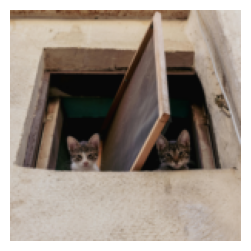

In [8]:
show_img(img2)